In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans
%matplotlib inline


## Load Data

In [2]:
file = '/Users/kiananasiri/Desktop/Machine Learning/clustering.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
print( df.shape )
print(df.columns )
df.head() 

(200, 5)
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Pre-processing

#### Encode Gender feature

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender' ] = le.fit_transform( df['Gender'] )
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
print(df.dtypes)
df = df.apply(pd.to_numeric ,errors='coerce' )
df.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object


CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Normalizing Data

In [8]:
X = df.values[:,1:]
X[:5]

array([[ 1, 19, 15, 39],
       [ 1, 21, 15, 81],
       [ 0, 20, 16,  6],
       [ 0, 23, 16, 77],
       [ 0, 31, 17, 40]])

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

2D Clustering based on Age and Spending Score¶

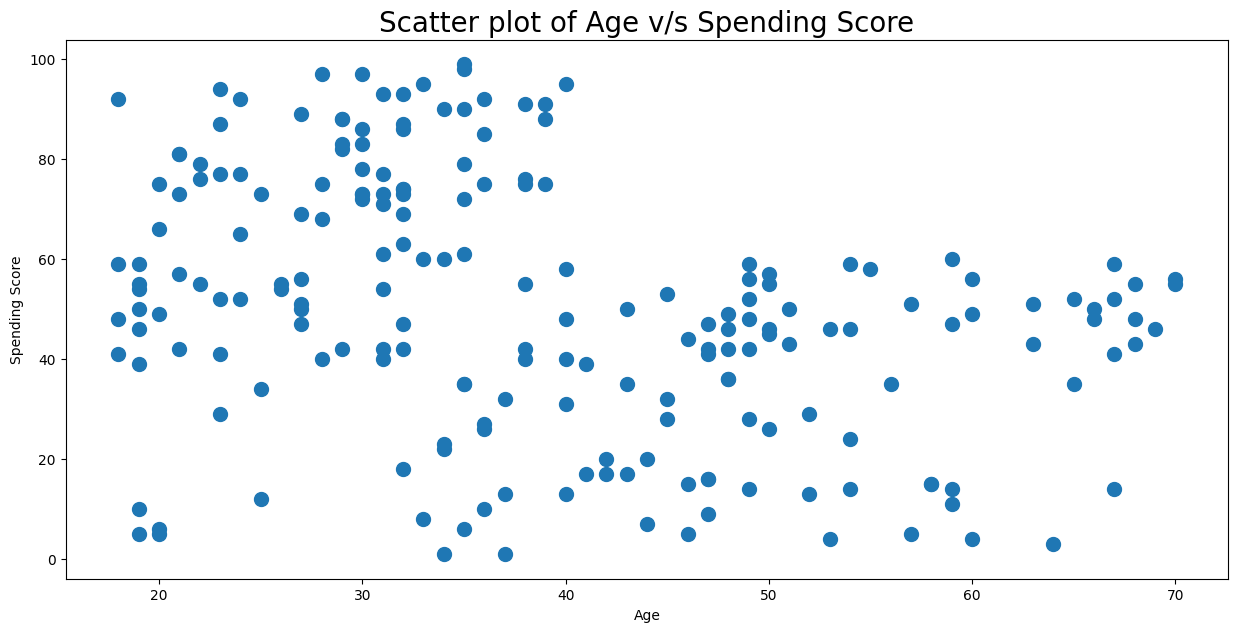

In [10]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter(df['Age'] , df['Spending Score (1-100)'], s = 100)
plt.show()

Deciding k value

# Modeling for different clustering algorithms 

## KMeans

In [11]:
X1 = X[:, [1,3]]
# selecting scaled age and spending score 
inertia = []
for n in range(3 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

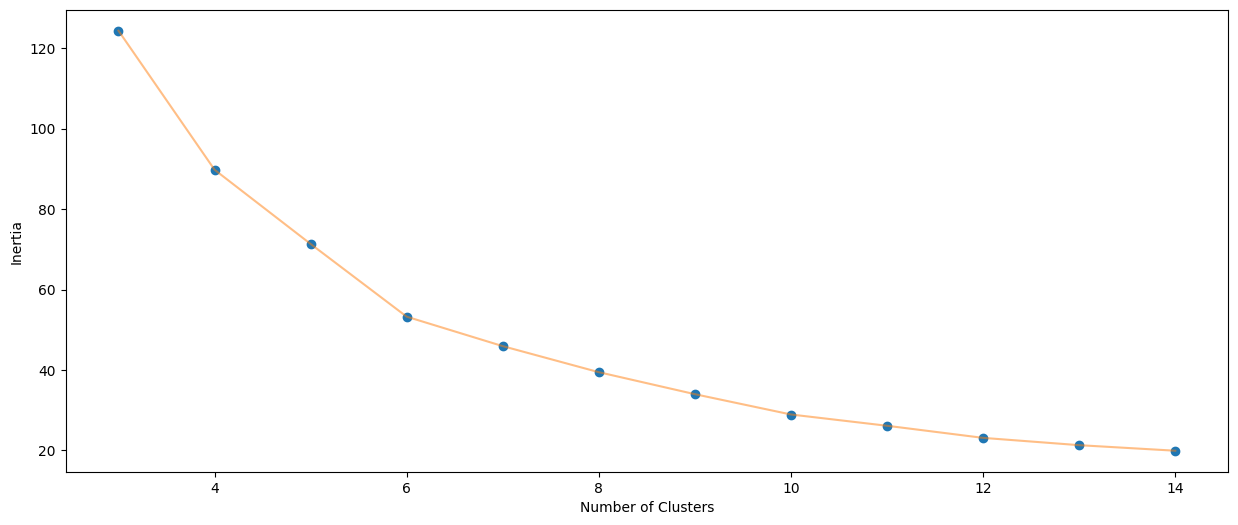

In [12]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(3, 15) , inertia , 'o')
plt.plot(np.arange(3 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

According to elbow method I choose vakue of 6 for k.

#### Model 

In [15]:
print ( df.columns )
model = KMeans( n_clusters = 6 , init = 'k-means++' , n_init = 15 ,random_state = 1 )


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


6


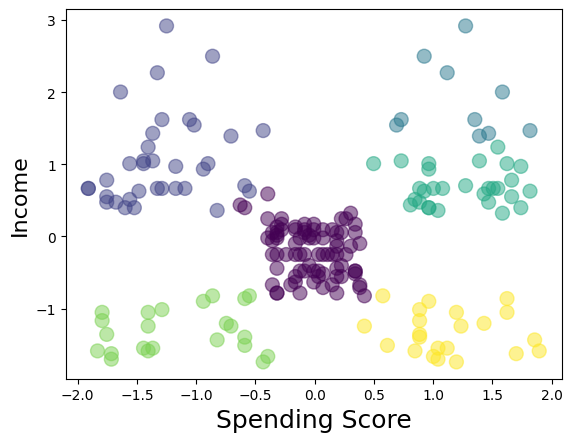

In [16]:
X3 = X[:, [3 , 2]]

model.fit(X3)
labels = model.labels_
print(len(set(labels))) 
#area = np.pi * ( X[:, 1] )**2  
plt.scatter(X[:, 3], X[:, 2], s=100, c=labels.astype(float), alpha=0.5)
plt.xlabel('Spending Score', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

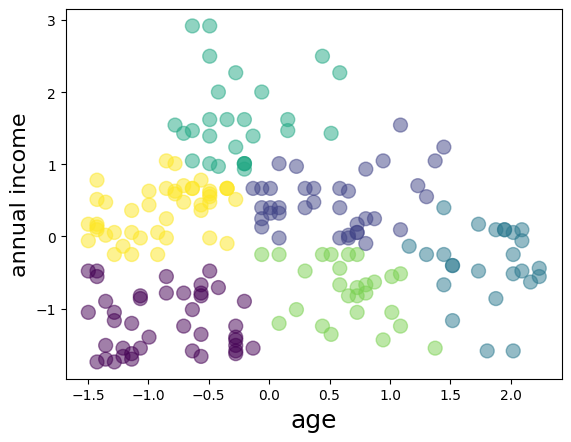

In [18]:
labels = model.labels_
#area = np.pi * ( X[:, 3] )**2 
X1 = X[:, [1,2]]
model.fit(X1)
plt.scatter(X[:, 1], X[:, 2], s=100 , c=labels.astype(float), alpha=0.5)
plt.xlabel('age', fontsize=18)
plt.ylabel('annual income', fontsize=16)
plt.show()

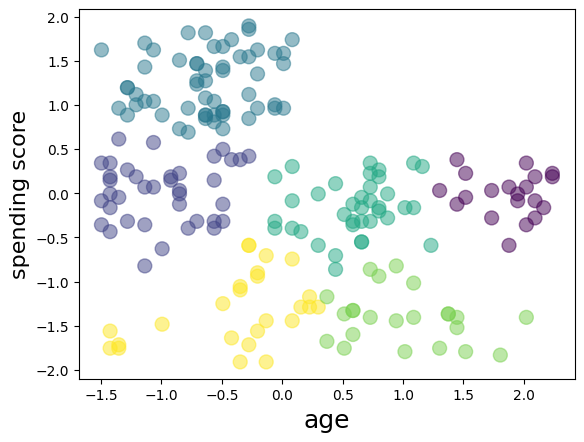

In [19]:
X2 = X[:, [1,3]]
model.fit(X2) 
labels = model.labels_
plt.scatter(X[:, 1], X[:, 3], s=100 , c=labels.astype(float), alpha=0.5)
plt.xlabel('age', fontsize=18)
plt.ylabel('spending score', fontsize=16)
plt.show()

 3D clustering Age , Income and Spending Score 

In [20]:
X3 = X[:, [1,2,3]]
inertia = []
for n in range(3 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

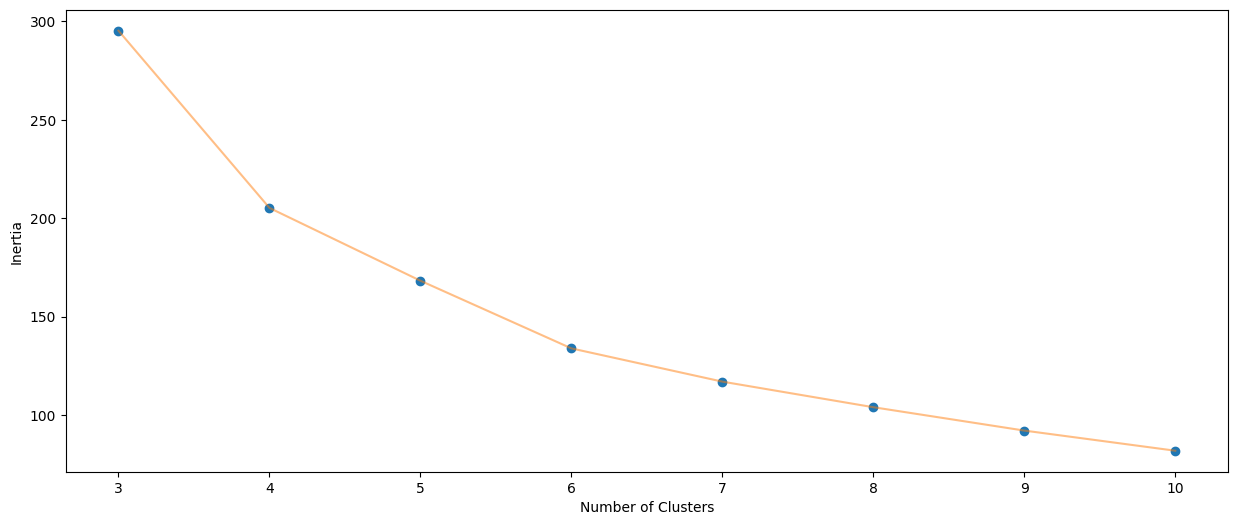

In [22]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(3, 11) , inertia , 'o')
plt.plot(np.arange(3 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

applying 6 for number of clusters according to elbow method.

In [26]:
algorithm = (KMeans(n_clusters = 7 , init='k-means++', n_init = 15 , max_iter=300, ))

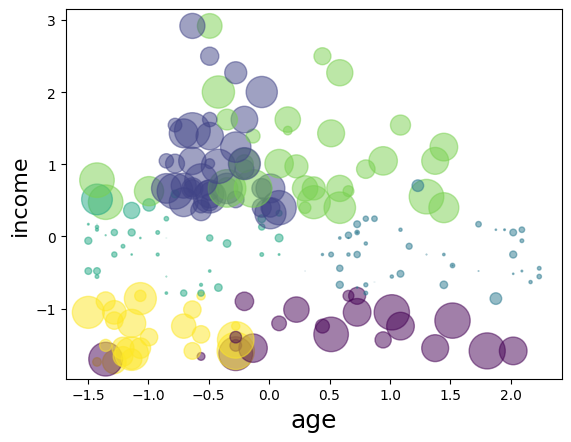

In [33]:
X2 = X[:, [1,2,3]]
model.fit(X2) 
labels = model.labels_
area = np.pi * ( (X[:, 3]*8 ) **2 )
plt.scatter(X[:, 1], X[:, 2], s=area , c=labels.astype(float), alpha=0.5)
plt.xlabel('age', fontsize=18)
plt.ylabel('income', fontsize=16)
plt.show()

In [37]:
df['Cluster_KMeans'] = labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KMeans
0,1,1,19,15,39,5
1,2,1,21,15,81,5
2,3,0,20,16,6,0
3,4,0,23,16,77,5
4,5,0,31,17,40,0


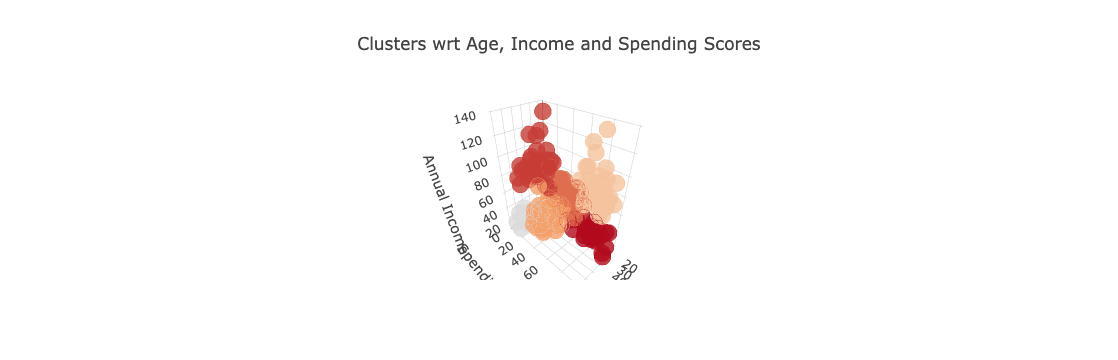

In [49]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.io as pio
pio.templates.default = None
%matplotlib inline


trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['Cluster_KMeans'], 
        size= 10,
        line=dict(
            color= df['Cluster_KMeans'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [50]:
df.groupby('Cluster_KMeans').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster_KMeans,,,,,
0,23.190476,0.380952,45.523810,26.285714,19.380952
1,162.000000,0.461538,32.692308,86.538462,82.128205
2,83.777778,0.422222,56.333333,54.266667,49.066667
3,92.552632,0.368421,26.684211,57.578947,47.789474
4,165.303030,0.575758,41.939394,88.939394,16.969697
5,23.041667,0.416667,25.250000,25.833333,76.916667


## Hiearchial 

Caluucating distenance matrix with for loops

/var/folders/tz/8b88qlx557g0hfgcm5j26kr00000gn/T/ipykernel_3794/1566499154.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/tz/8b88qlx557g0hfgcm5j26kr00000gn/T/ipykernel_3794/1566499154.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/tz/8b88qlx557g0hfgcm5j26kr00000gn/T/ipykernel_3794/1566

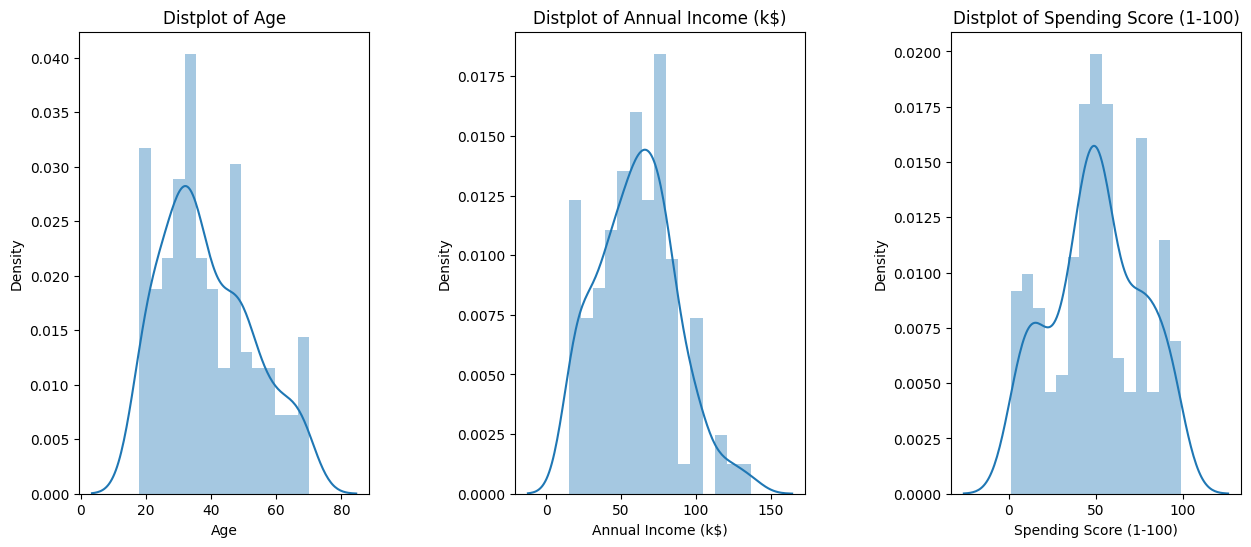

In [83]:
import seaborn as sns

plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

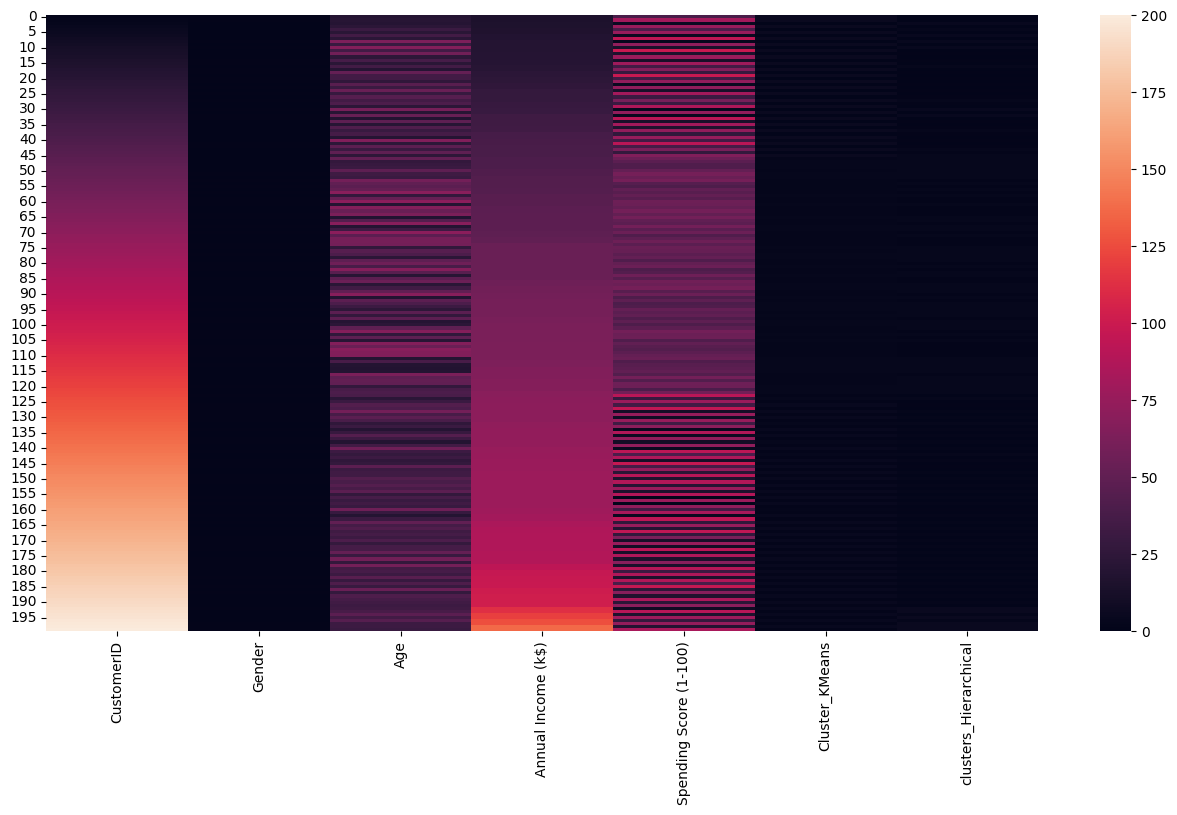

In [84]:
plt.figure(1, figsize = (16 ,8))
sns.heatmap(df)
plt.show()

In [52]:
import scipy
leng = X.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(X[i], X[j])
D

array([[0.        , 1.63681098, 2.38878538, ..., 4.54611614, 4.81867651,
        5.02250496],
       [1.63681098, 0.        , 3.54154808, ..., 4.3182849 , 5.31878915,
        4.70189264],
       [2.38878538, 3.54154808, 0.        , ..., 5.42195122, 5.13299938,
        5.90251765],
       ...,
       [4.54611614, 4.3182849 , 5.42195122, ..., 0.        , 2.21418015,
        0.5647686 ],
       [4.81867651, 5.31878915, 5.13299938, ..., 2.21418015, 0.        ,
        2.5274803 ],
       [5.02250496, 4.70189264, 5.90251765, ..., 0.5647686 , 2.5274803 ,
        0.        ]])

In [53]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

/var/folders/tz/8b88qlx557g0hfgcm5j26kr00000gn/T/ipykernel_3794/227076933.py:3: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



In [54]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 41,  39,  64,  34,  24,  34,  65,  31,  66,  35,  66,  30, 103,
        34, 109,  39,  24,  40, 110,  30, 111,  36, 102,  36, 100,  36,
        96,   6,  96,  33,  67,  32,  68,  37, 101,  33,  97,  25,  98,
        32,  91,  38, 115,  29,  99,  25,  11,  28,  26,  26,  11,   7,
        29, 104,  11, 115,  11, 106,  28, 116, 106,   3,  89,  93, 105,
         3,  13,  89,   3,  27, 106,  12,  92,  92, 117,   2,  13,   5,
        17,  15, 117,   5, 107,  12,  17, 113,  93,  17,   9,  15,  90,
         4, 113,   8,  20,   2,  15,  21, 113,   4,  18,  15, 108,   1,
       114,  18,  90, 118, 107, 108, 108,  19,   8,   4,  19,  19,  94,
        14,  16,  14,   1,   8,  10,  55,  22,  42, 112,  55,  72,  56,
        75,  56,  22,  42,  69,  46,  84,  57,  69,  42,  88,  54,  23,
        46,  70,  50, 112,  43,  80,  54,  73,  55,  83,  44,  83,  46,
        76,  43,  76,  43,  95,  46,  69,  45,  74,  44,  73,  45,  80,
        58,  77,  52,  77,  49,  86,  45,  71,  52,  71,  49,  7

In [55]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([2, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 5, 2, 5, 2, 1, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 1, 5, 2, 4, 2, 4, 2, 5, 2, 5, 1, 5, 2, 5, 2, 5, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 5, 1, 5, 5, 1, 5, 5, 5, 1,
       1, 5, 1, 1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 5, 5, 1,
       1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 5, 5,
       5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 1, 2, 5, 2, 5, 2, 5, 2,
       1, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 3, 3, 5, 3, 5, 3,
       3, 3], dtype=int32)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_KMeans'],
      dtype='object')


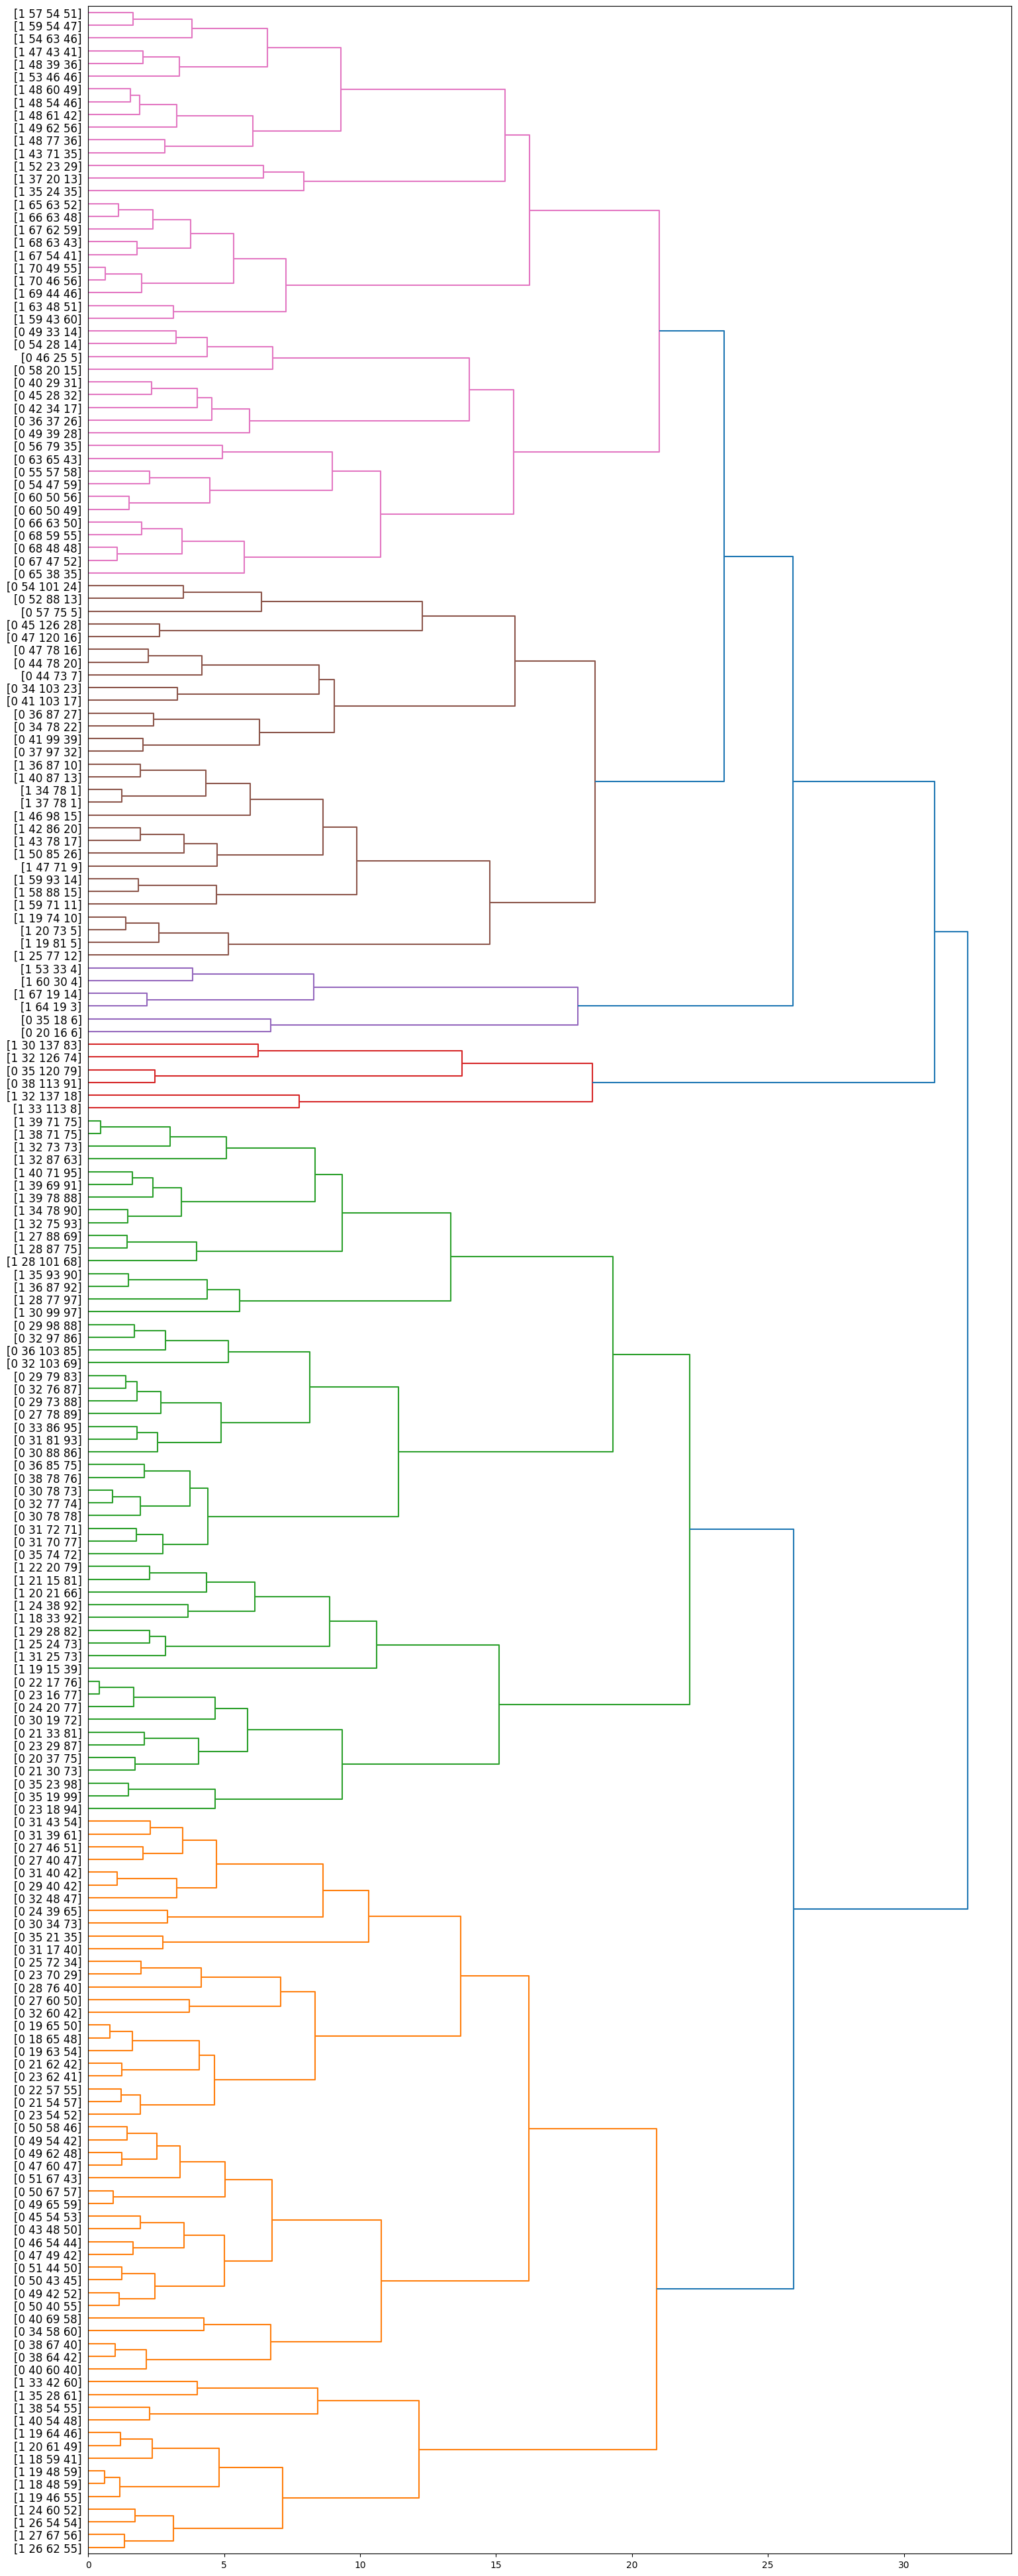

In [56]:
fig = pylab.figure(figsize=(18,50))
print (df.columns)
def llf(id):
    return '[%s %s %s %s]' % (df['Gender'][id], df['Age'][id], int(df['Annual Income (k$)'][id]) , int(df['Spending Score (1-100)'][id]) ) 
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### Clustering using scikit learn

In [57]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(X,X) 
print(dist_matrix)

[[0.         1.63681098 2.38878538 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         3.54154808 ... 4.3182849  5.31878915 4.70189264]
 [2.38878538 3.54154808 0.         ... 5.42195122 5.13299938 5.90251765]
 ...
 [4.54611614 4.3182849  5.42195122 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 5.13299938 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 5.90251765 ... 0.5647686  2.5274803  0.        ]]


In [58]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

/var/folders/tz/8b88qlx557g0hfgcm5j26kr00000gn/T/ipykernel_3794/1633147189.py:1: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



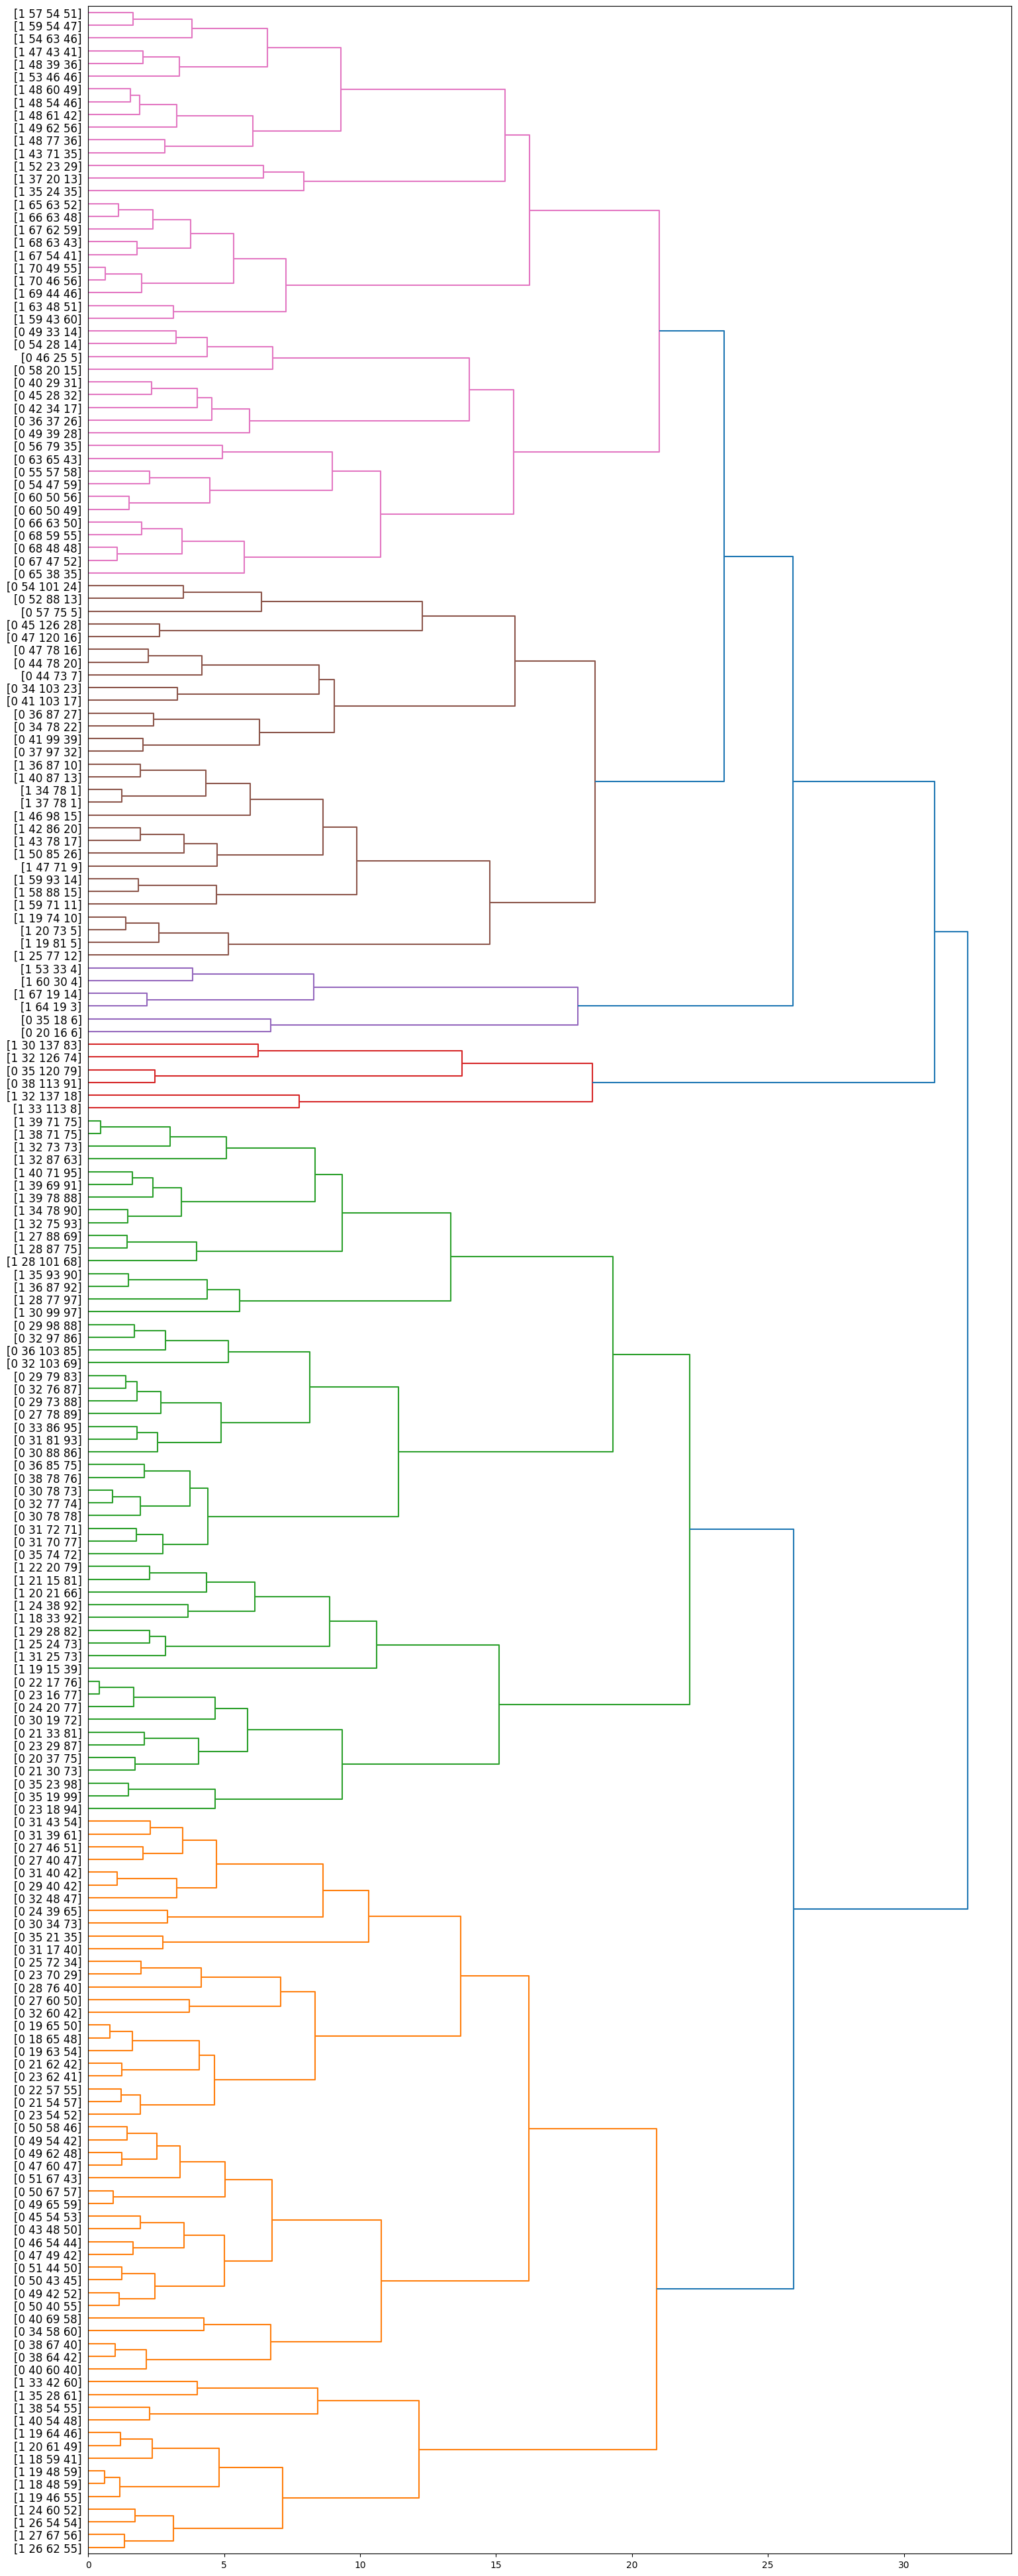

In [59]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s %s]' % (df['Gender'][id], df['Age'][id], int(df['Annual Income (k$)'][id]) , int(df['Spending Score (1-100)'][id]) ) 
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [60]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:585: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



array([0, 0, 4, 0, 3, 0, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 3, 1, 0, 4, 0, 4, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3,
       3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 0, 1, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 5, 5, 2, 5, 2, 5,
       5, 5])

In [86]:
df['clusters_Hierarchical'] = agglom.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KMeans,clusters_Hierarchical
0,1,1,19,15,39,5,0
1,2,1,21,15,81,5,0
2,3,0,20,16,6,0,4
3,4,0,23,16,77,5,0
4,5,0,31,17,40,0,3


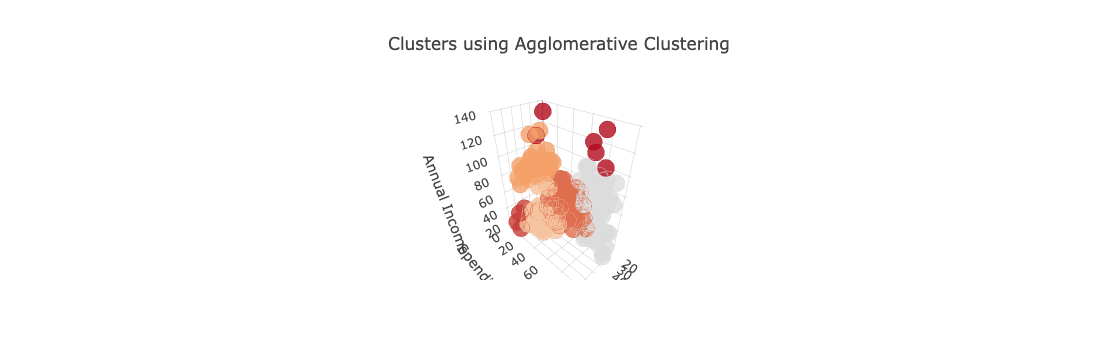

In [87]:
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['clusters_Hierarchical'], 
        size= 10,
        line=dict(
            color= df['clusters_Hierarchical'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In the cell below, the plot compares Age and Income as axes, with Spending score represented on each point.

/var/folders/tz/8b88qlx557g0hfgcm5j26kr00000gn/T/ipykernel_3794/3109307762.py:13: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

/var/folders/tz/8b88qlx557g0hfgcm5j26kr00000gn/T/ipykernel_3794/3109307762.py:13: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

/var/folders/tz/8b88qlx557g0hfgcm5j26kr00000gn/T/ipykernel_3794/3109307762.py:13: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should 

Text(0, 0.5, 'annual income')

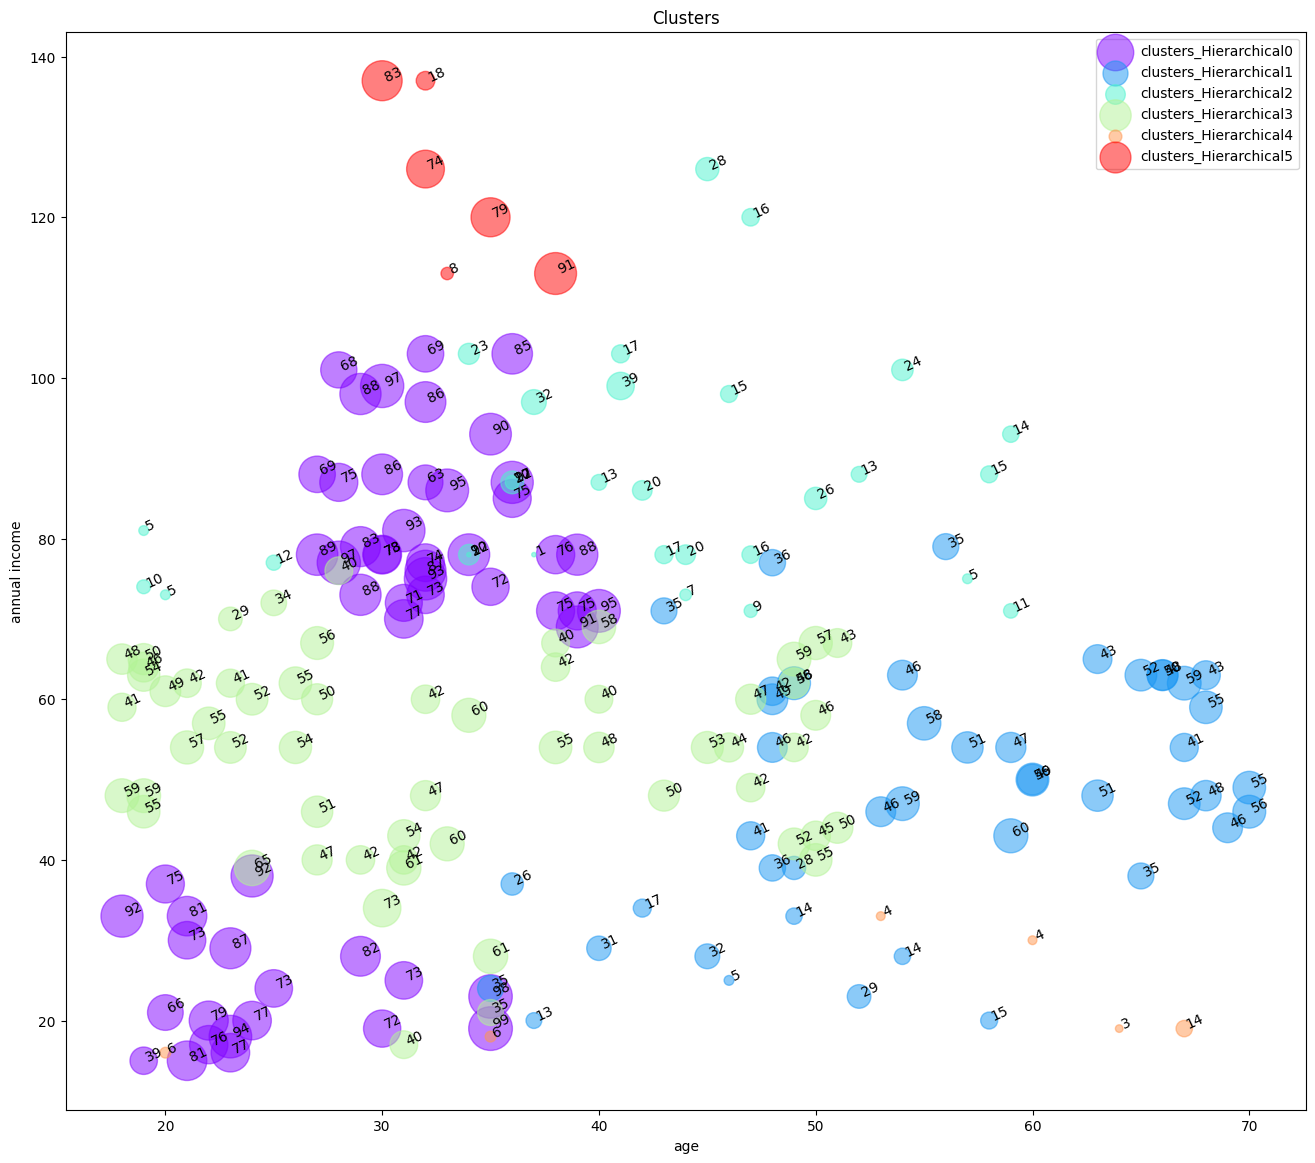

In [63]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.clusters_Hierarchical == label]
    for i in subset.index:
            plt.text(subset.Age[i], subset['Annual Income (k$)'][i] ,str(subset['Spending Score (1-100)'][i]), rotation=25) 
    plt.scatter(subset.Age, subset['Annual Income (k$)'], s= subset['Spending Score (1-100)']*10, c=color, label='clusters_Hierarchical'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Annual Income')

In the cell below, the plot compares Annual Income and Spending Score as axes, with age represented on each point.

/var/folders/tz/8b88qlx557g0hfgcm5j26kr00000gn/T/ipykernel_3794/789335155.py:13: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

/var/folders/tz/8b88qlx557g0hfgcm5j26kr00000gn/T/ipykernel_3794/789335155.py:13: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

/var/folders/tz/8b88qlx557g0hfgcm5j26kr00000gn/T/ipykernel_3794/789335155.py:13: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be 

Text(0, 0.5, 'spending score')

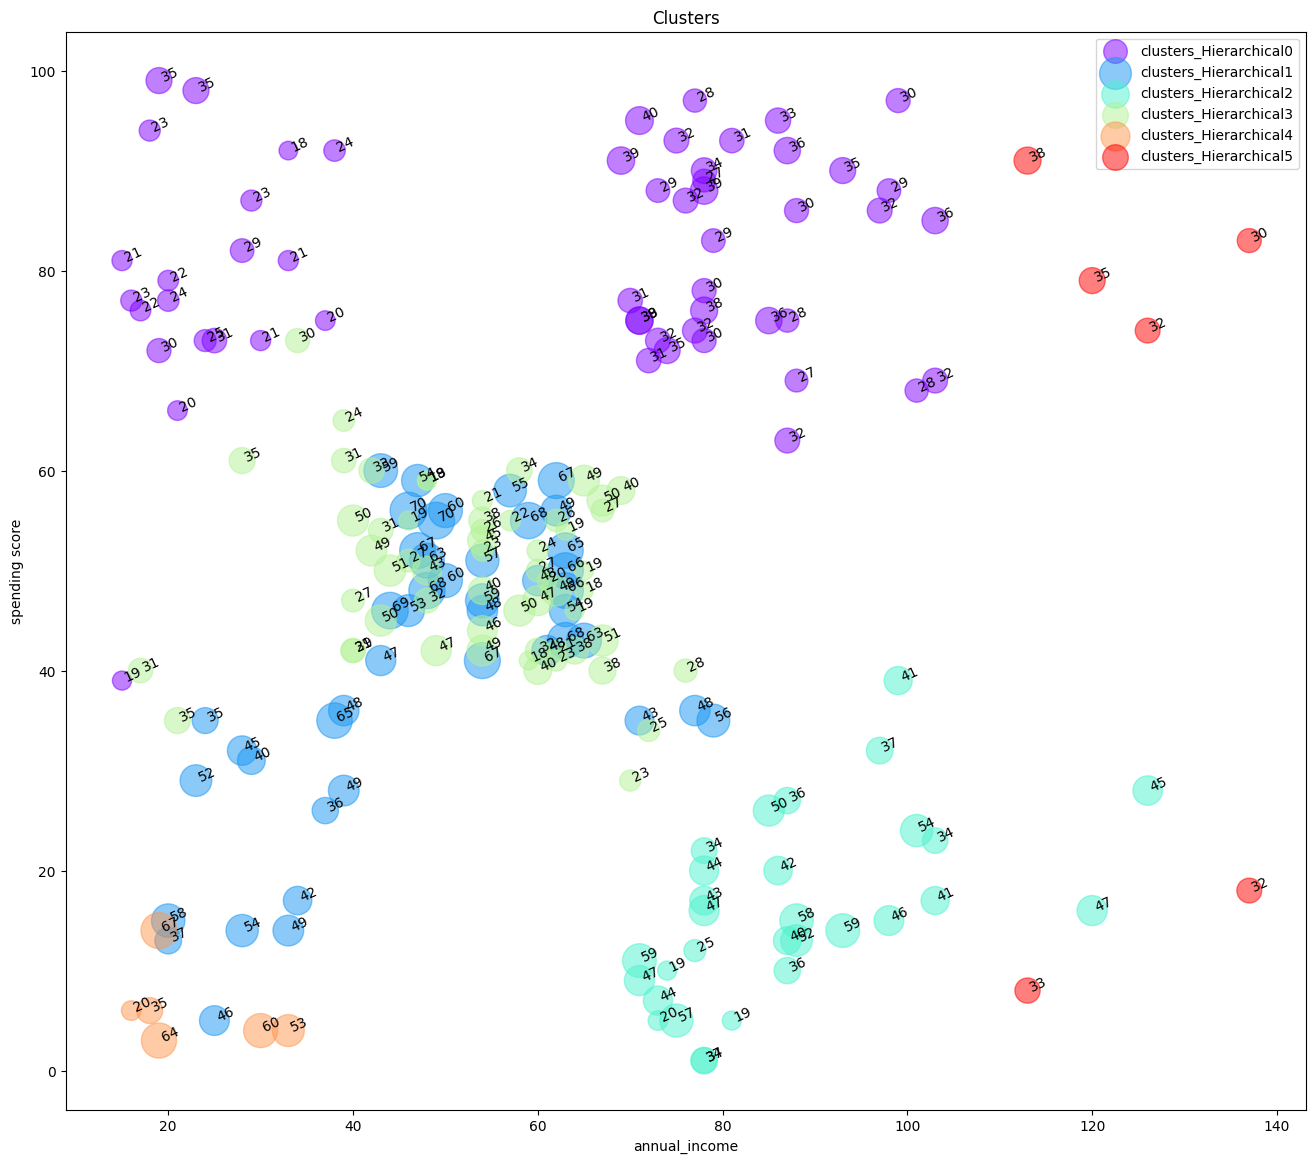

In [70]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.clusters_Hierarchical == label]
    for i in subset.index:
            plt.text( subset['Annual Income (k$)'][i] , subset['Spending Score (1-100)'][i] , str(subset['Age'][i]),  rotation=25) 
    plt.scatter( subset['Annual Income (k$)'] , subset['Spending Score (1-100)'], s = subset['Age'] * 10 , c=color, label='clusters_Hierarchical'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('annual_income')
plt.ylabel('spending score')

In the cell below, the plot compares Age and Score as axes, with Annual Income represented on each point."

/var/folders/tz/8b88qlx557g0hfgcm5j26kr00000gn/T/ipykernel_3794/3652416992.py:13: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

/var/folders/tz/8b88qlx557g0hfgcm5j26kr00000gn/T/ipykernel_3794/3652416992.py:13: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

/var/folders/tz/8b88qlx557g0hfgcm5j26kr00000gn/T/ipykernel_3794/3652416992.py:13: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should 

Text(0, 0.5, 'Spending Score')

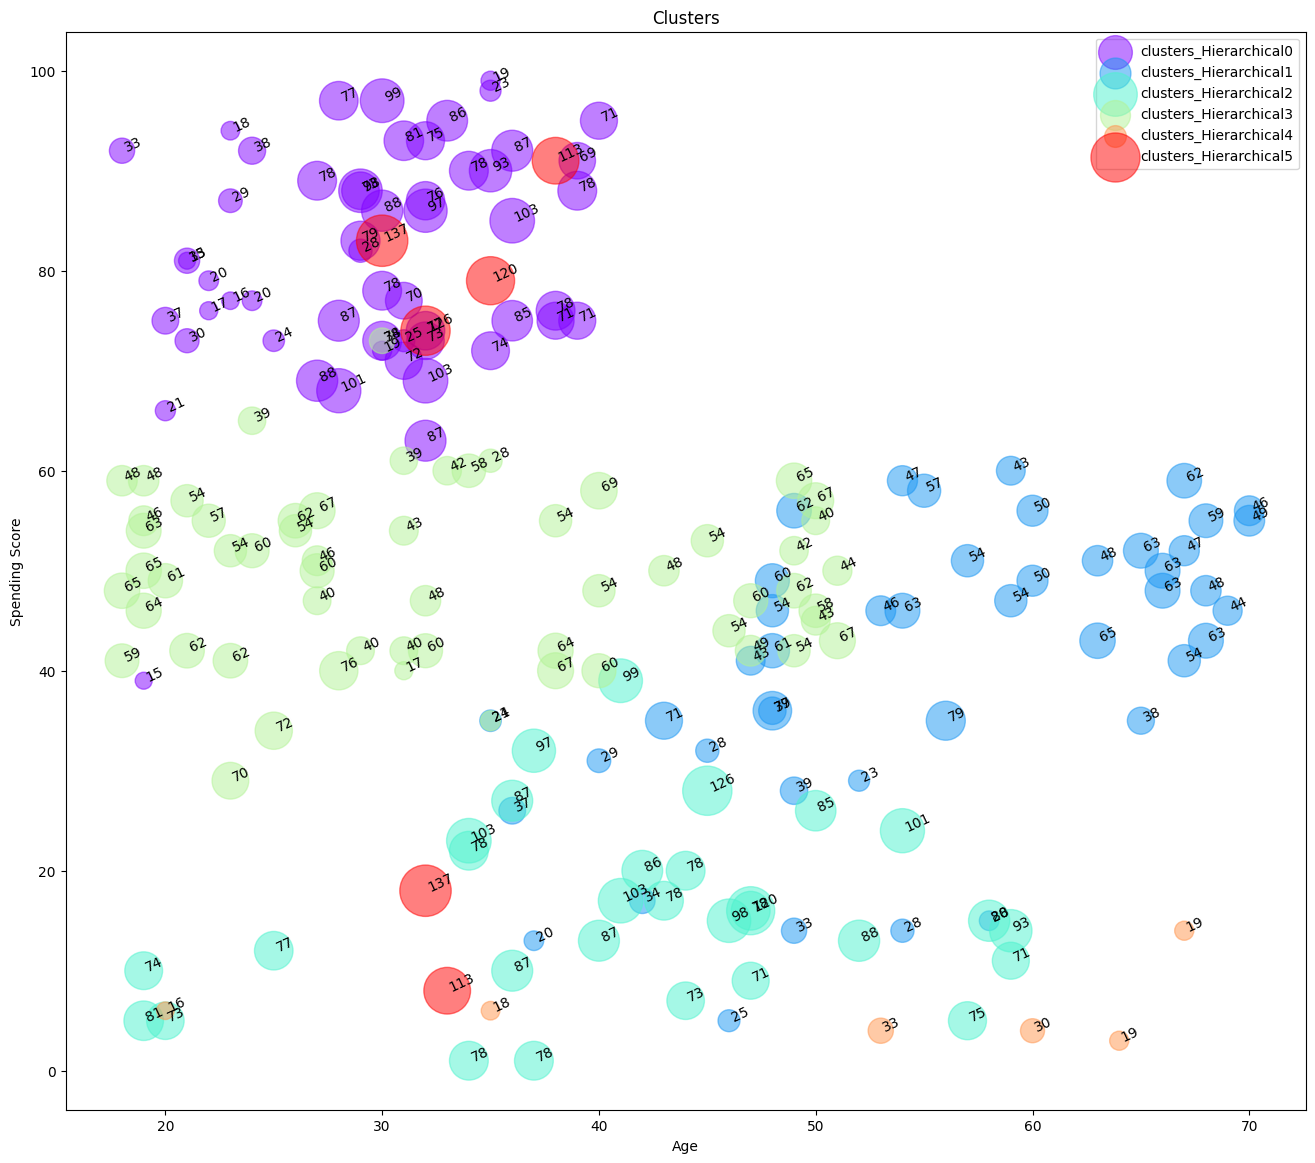

In [73]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.clusters_Hierarchical == label]
    for i in subset.index:
            plt.text( subset['Age'][i] , subset['Spending Score (1-100)'][i] , str(subset['Annual Income (k$)'][i]),  rotation=25) 
    plt.scatter( subset['Age'] , subset['Spending Score (1-100)'], s = subset['Annual Income (k$)'] * 10 , c=color, label='clusters_Hierarchical'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score')

In [71]:
df.groupby(['clusters_Hierarchical','Gender'])['clusters_Hierarchical'].count()

clusters_Hierarchical  Gender
0                      0         30
                       1         25
1                      0         20
                       1         25
2                      0         14
                       1         16
3                      0         44
                       1         14
4                      0          2
                       1          4
5                      0          2
                       1          4
Name: clusters_Hierarchical, dtype: int64

In [72]:
agg_customers = df.groupby(['clusters_Hierarchical','Gender'])['Age'].mean()
print ( agg_customers )

agg_customers = df.groupby(['clusters_Hierarchical' , 'Gender' ])['Spending Score (1-100)'].mean()
print ( agg_customers )

agg_customers = df.groupby(['clusters_Hierarchical' , 'Gender' ])['Annual Income (k$)'].mean()
print ( agg_customers )


clusters_Hierarchical  Gender
0                      0         29.333333
                       1         29.840000
1                      0         55.050000
                       1         55.600000
2                      0         43.785714
                       1         39.625000
3                      0         35.113636
                       1         25.857143
4                      0         27.500000
                       1         61.000000
5                      0         36.500000
                       1         31.750000
Name: Age, dtype: float64
clusters_Hierarchical  Gender
0                      0         81.800000
                       1         80.320000
1                      0         36.100000
                       1         44.760000
2                      0         20.642857
                       1         11.500000
3                      0         48.272727
                       1         53.571429
4                      0          6.000000
           

## DBSACN

Using elbow method to find most optimal epsilon

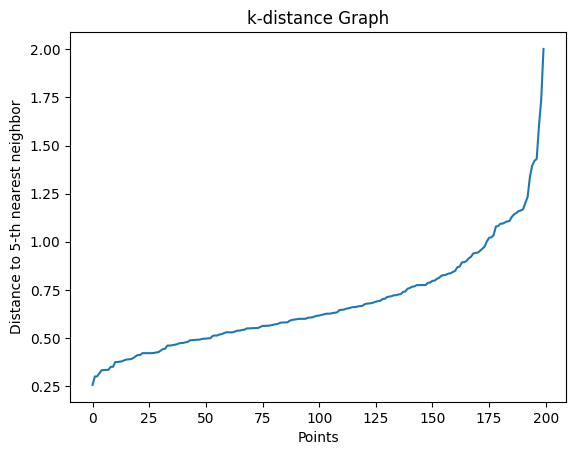

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
min_samples = 4 + 1
# Assuming X is your data matrix
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort distances
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)
plt.plot(sorted_distances)
plt.xlabel("Points")
plt.ylabel("Distance to {}-th nearest neighbor".format(min_samples))
plt.title("k-distance Graph")
plt.show()

# Look for the "elbow" in this plot to choose epsilon


In [96]:
from sklearn.cluster import DBSCAN
epsilon = 1.15
minimumSamples = 6
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([ 0,  0,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  0,  1,
        0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,
        1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,
        0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0, -1, -1])

#### Distigiush outliers

In [97]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False,  True, False,  True,  True,  True,  True,  True, False,
        True, False, False, False,  True, False,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [98]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

2

In [99]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1}

In [100]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


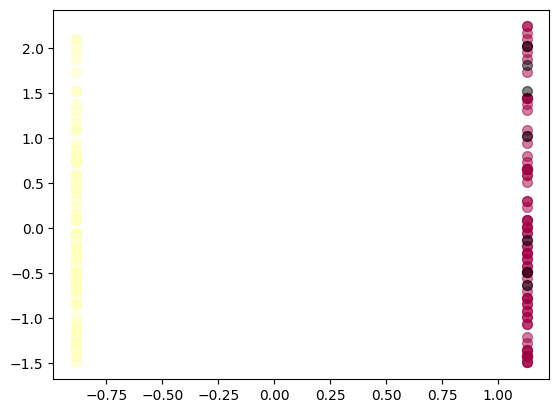

In [101]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

In [102]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_KMeans', 'clusters_Hierarchical'],
      dtype='object')

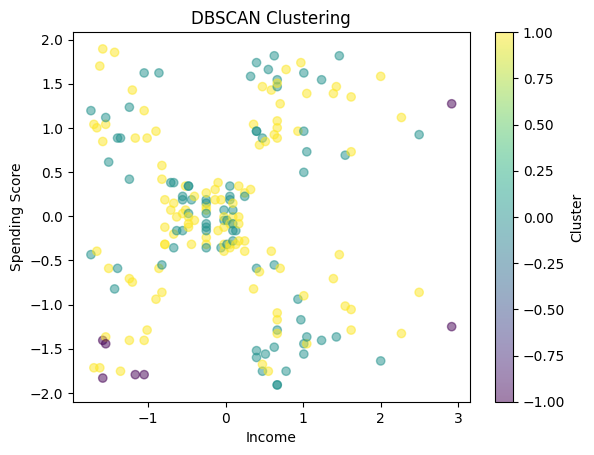

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


# Visualize the clusters
plt.scatter(X[:, 2], X[:, 3], c=labels, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()
